# NASNETLarge

In [21]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#visualize Augmentation from directory!
def looking_at_augmentation (data_generator, batchsize, path):
    im, label = next(data_generator)
    im = (im - np.min(im))/np.ptp(im) # to normalize all images --> matplotlib only takes pos. values between 0..1 / 0..255 
    imgs = list(im)
    labels = list(label)
    
    fig, ax = plt.subplots(ncols=3, nrows=3)
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle('Augmented Images', fontsize=16)
    plt.figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')

    for ax in ax.flatten():
        ax.axis('off')

    for i, im  in enumerate(imgs[:batchsize]):
        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(im)
        fig.set_figheight(8)
        fig.set_figwidth(8)

    #fig.tight_layout()
    fig.savefig('Augmented-Images.png', dpi=300)

#fast plot of training history
def plot_history(history, modelname, path):
    hist_df = pd.DataFrame(history.history)
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_categorical_accuracy, lw=5, label='Validation Accuracy')
    axs[0].plot(hist_df.categorical_accuracy, lw=5, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
    axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
    axs[1].set_ylabel('MLogLoss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)
    fig.savefig(path + '\History_{}.png' .format(modelname), dpi=300)
    hist_df.to_csv()
    plt.show();

from sklearn.metrics import roc_curve, roc_auc_score, auc#plotting the receiver operating characteristics --> evaluate performance cutting point vice
def plot_roc(label, predictions, modelname, path): #IDEA: set diffrent cutting point based on ROC for ensembling   
    roc_auc_score(label, predictions)
    print('The ROC-Score is: {}' .format(roc_auc_score))

    fpr_keras, tpr_keras, thresholds_keras = roc_curve(label, predictions)
    auc_keras = auc(fpr_keras, tpr_keras)
    #print(auc_keras)

    fig = plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve: {}' .format(auc_keras))
    plt.legend(loc='best')
    fig.savefig(path + '\ROC-Curve_{}.png' .format(modelname), dpi=300) #saving PLOT 
    plt.show()
    
from sklearn.metrics import confusion_matrix
import itertools
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
#plotting correctly classified images: https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
def plot_correct(vals, y_pred, y_label, modelname, path):
    correct = np.where(y_pred==y_label)[0]
    print ("Found %d correct labels" % len(correct))


    fig, ax = plt.subplots(ncols=3, nrows=3)
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle('Correct Images', fontsize=16)
    plt.figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')

    for ax in ax.flatten():
        ax.axis('off')

    for i, correct in enumerate(correct[:9]):
        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(vals[correct])
        ax.set_title("Predicted {}, Class {}".format(y_pred[correct], y_label[correct]), fontsize=10)
        fig.set_figheight(8)
        fig.set_figwidth(8)

    fig.savefig(path + '\Correct_Images_{}.png' .format(modelname), dpi=100) #saving PLOT 

#Plotting incorrectly classified
def plot_incorrect(vals, y_pred, y_label, filenames, modelname, path):
    incorrect = np.where(y_pred!=y_label)[0]
    print ("Found %d incorrect labels" % len(incorrect))


    fig, ax = plt.subplots(ncols=3, nrows=3)
    fig.subplots_adjust(hspace=1)
    plt.suptitle('Incorrect Images', fontsize=16)
    plt.figure(num=None, figsize=(50, 50), dpi=100, facecolor='w', edgecolor='k')

    for ax in ax.flatten():
        ax.axis('off')

    for i, incorrect in enumerate(incorrect[:9]):
        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(vals[incorrect])
        ax.set_title("Predicted {}, Class {}, Filename {}".format(y_pred[incorrect], y_label[incorrect], filenames[incorrect]), fontsize=10)
        fig.set_figheight(8)
        fig.set_figwidth(8)

    fig.savefig(path + '\Incorrect_Images_{}.png' .format(modelname), dpi=100) #saving PLOT 
    
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

In [22]:
import os
import shutil
print(os.listdir(r"D:\Doktorarbeit\FCD\Tiles"))

import numpy as np
import pandas as pd 

from glob import glob
from random import shuffle
from time import time

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from imgaug import augmenters as iaa
import imgaug as ia
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint, Callback, LambdaCallback
from keras.metrics import categorical_accuracy
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

['FCD', 'Train', 'TSC', 'Validation']


In [23]:
import imgaug as ia
from imgaug import augmenters as iaa
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 20% of all images
        sometimes(iaa.Affine(
            scale={"x": (0.9, 1.6), "y": (0.9, 1.6)}, #>20 will cut part of img
            translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)}, # >20% will also cut part of img
            rotate=(-10, 10), # 45/-45° -> works good with scale + translate to prevent cuts
            shear=(-5, 5), # shear by -16 to +16 degrees
            mode=ia.ALL 
        )),
        iaa.SomeOf((0, 4), [
                sometimes(iaa.Superpixels(p_replace=(0.3, 0.7), n_segments=(10, 100))), #superpixel-representation --> better basallamina representation 
                iaa.OneOf([
                    iaa.GaussianBlur((0, 0.1)), #small blur effects --> better representation
                    #iaa.AverageBlur(k=(1, 3)), # k must be odd
                    #iaa.MedianBlur(k=(1, 3)), # 
                ]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.9, 1.1)), #cell wall represenation
                iaa.Emboss(alpha=(0, 0.8), strength=(0, 0.5)), #cell wall represenation
                #searching for edges or angles --> blobby mask --> better basallamina representation / nuclei
                iaa.SimplexNoiseAlpha(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0.2, 0.4)), #detects edges --> cell wall,..
                    iaa.DirectedEdgeDetect(alpha=(0.2, 0.4), direction=(0.0, 1.0)), #direction will make edges from random directions 
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.01*255), per_channel=0.2), # add gaussian noise to images
             iaa.OneOf([
                    iaa.Dropout((0.05, 0.2), per_channel=0.2), #rnd remove 5% in small pixels
                    iaa.CoarseDropout((0.05, 0.2), size_percent=(0.01, 0.02), per_channel=0.2),# rnd remove 3% in big pixels
                ]),
                iaa.Invert(0.01, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.3), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-0.1, 0.1)), # change hue and saturation
                #
                #either change the brightness of the whole image (sometimes per channel) or change the brightness of subareas
                iaa.OneOf([
                    iaa.Multiply((0.9, 1.1), per_channel=0.5),
                    iaa.FrequencyNoiseAlpha(
                        exponent=(-1, 0),
                        first=iaa.Multiply((0.9, 1.1), per_channel=True),
                        second=iaa.ContrastNormalization((0.9, 1.1))
                    )
                ]),
                sometimes(iaa.ElasticTransformation(alpha=(0, 0.5), sigma=0.1)), #still not sure: move pixels locally around
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.02))), #still not sure:move parts of the image around
                sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
                     random_order=True
        )
    ],
    random_order=True
)

In [8]:
IMAGE_SIZE = 100
IMAGE_CHANNELS = 3

train_path = (r'C:\Users\eg38emed\FCD\kfold\base_dir_fold_4\train_dir')
val_path = (r'C:\Users\eg38emed\FCD\kfold\base_dir_fold_4\val_dir')

In [9]:
train_batch_size_1 = 64
val_batch_size = 64
#datagenerators
datagen_train = ImageDataGenerator(preprocessing_function=seq.augment_image,
                            rescale=1./255)

datagen_val = ImageDataGenerator(rescale=1./255)



train_gen_1 = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size_1,
                                        class_mode='categorical')

val_gen = datagen_val.flow_from_directory(val_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

num_train_samples = len(train_gen_1)
num_val_samples = len(val_gen)

Found 72582 images belonging to 2 classes.
Found 8065 images belonging to 2 classes.


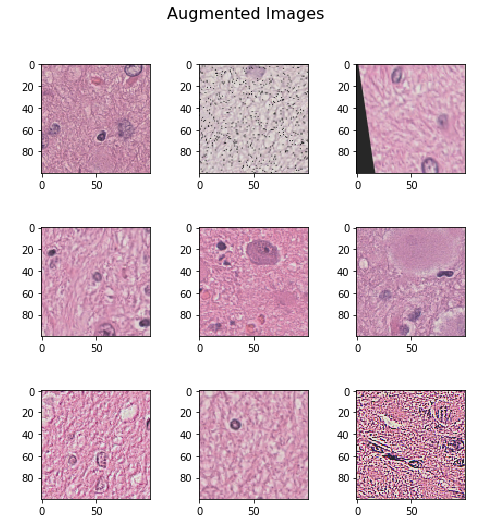

<Figure size 5000x5000 with 0 Axes>

In [10]:
looking_at_augmentation(train_gen_1, path = train_path, batchsize=9)

### NASNetL

In [ ]:
model_name = 'NASNetL_kfold_4'

base_path = (r'C:\Users\eg38emed\FCD\Models\{}'.format(model_name))
print(base_path)
if not os.path.exists(base_path):
    os.makedirs(base_path)

In [ ]:
def get_model_classif_nasnetl():
    inputs = Input((IMAGE_SIZE, IMAGE_SIZE, 3))
    base_model_NASNet = NASNetLarge(weights=None, include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)) 
    x = base_model_NASNet(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(2, activation="softmax", name="3_")(out)
    model = Model(inputs, out)
    model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=[categorical_accuracy, auc_roc])
    model.summary()

    return model

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    return [earlystopping, ReduceLR, checkpoint]

In [ ]:
model = get_model_classif_nasnetl()

In [ ]:
import sys
sys.path.append(r"C:\Users\eg38emed\FCD\FCD vs TSC\keras_utils")
from keras_lr_finder import LRFinder

lr_gen = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        batch_size=4000,
                                        class_mode='categorical')

x_lr_train,y_lr_train= lr_gen.next();x_lr_train.shape
lr_finder = LRFinder(model)

lr_finder.find(x_lr_train, y_lr_train, 0.000001, 0.1, batch_size=64, epochs=4)
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

In [ ]:
import clr_callback
from keras.callbacks import CSVLogger
def get_callbacks_clr(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    clr = clr_callback.CyclicLR(base_lr=0.0001, max_lr=0.0005,
                        step_size=num_train_samples/train_batch_size_1/2)
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_toplayer.csv".format(model_name), append=True)
    return [clr, earlystopping, ReduceLR, checkpoint, csv_logger]

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_ALL.csv".format(model_name), append=True)
    return [earlystopping, ReduceLR, checkpoint, csv_logger]

name_weights = (base_path + "\\{}.h5".format(model_name))
callbacks_list = get_callbacks_clr(name_weights = name_weights)

In [ ]:
history = model.fit_generator(train_gen_1, 
                    steps_per_epoch=train_gen_1.samples // train_batch_size_1, 
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_batch_size,
                    epochs=100, verbose=1,
                    callbacks=callbacks_list)

In [ ]:
plot_history(history, modelname = model_name, path=base_path)

In [ ]:
# Setup the data_frame: Path, ID, Label, Image
path = val_path
fcd = path + '\FCD'
tsc = path + '\TSC'

#fcd folder
df = pd.DataFrame({'path': glob(os.path.join(fcd,'*.png'))})
df['id'] = df.path.map(lambda x: x.split('\\')[6].split('.')[0]) 
df['label'] = 0

#tsc folder
df_pos = pd.DataFrame({'path': glob(os.path.join(tsc,'*.png'))})
df_pos['id'] = df_pos.path.map(lambda x: x.split('\\')[6].split('.')[0]) 
df_pos['label'] = 1

#both
df_train = pd.concat([df, df_pos])

#add images
df_train['image'] = df_train['path'].map(imread)

print(df_train.head())
print(len(df_train))

In [ ]:
batch_size=1
datagen_test = ImageDataGenerator(rescale=1./255)

test_generator = datagen_test.flow_from_directory(val_path, 
                                                  batch_size = batch_size, 
                                                  shuffle=False,#FALSEFALSEFALSEFALSEFALSEFALSEFALSEFALSEFALSEFALSEFALSEFALSE
                                                  target_size=(96, 96), 
                                                  class_mode='categorical')

In [ ]:
#extracting images out of df
imgs = []
for img in df_train['image']:
    imgs.append(img)
        
X = np.asarray(imgs)
y = to_categorical(df_train['label'])

print(X.shape)
print(y.shape)

In [ ]:
im=X[0]
plt.imshow(im)
print(df_train.iloc[0])
filenames = test_generator.filenames
print(filenames[:1])

In [ ]:
#evaluate model on validation-data + test_datagen --> weights of best training epoch will be used
model_VGG = get_model_classif_VGG_base_trainable()
model_VGG.load_weights("VGG_FCD_All.h5")
val_loss, val_acc = \
model_VGG.evaluate_generator(test_generator, 
                             steps=len(df_train),
                             verbose=1)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

In [ ]:
test_generator.reset()
predictions = model_VGG.predict_generator(test_generator, 
                                          steps=len(df_train), 
                                          workers=6, 
                                          use_multiprocessing=False, 
                                          verbose=1)

In [ ]:
# Get the true labels
y_label = np.argmax(y, axis=1)
print(y_label)

df_preds = pd.DataFrame(predictions, columns=['no_tumor_tissue', 'has_tumor_tissue'])
print(df_preds.head())
# Get the predicted labels as probabilities
y_pred = df_preds['has_tumor_tissue']

In [ ]:
#maybe change pos/neg cutoff:
plot_roc(y_label, y_pred, modelname='VGG')

cm = confusion_matrix(y_label, y_pred.round())
cm_plot_labels = ['FCD', 'TSC']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix VGG')

In [ ]:
#rounding predictions + make them int --> compare to label / heatmap
y_pred = y_pred.round()
y_pred_int = []
for i in y_pred:
    if i == 1.0:
        y_pred_int.append(1)
    else:
        y_pred_int.append(0)

y_pred_int = np.asarray(y_pred_int)
print((y_pred_int.shape))

In [ ]:
plot_correct(X, y_pred_int, y_label, modelname='VGG')
plot_incorrect(X, y_pred_int, y_label, modelname='VGG')

# NASNetM

In [ ]:
model_name = 'Xception_kfold4'
base_path = (r'C:\Users\eg38emed\FCD\Models\{}'.format(model_name))
if not os.path.exists(base_path):
    os.makedirs(base_path)

In [8]:
def get_model_classif_nasnetm():
    inputs = Input((IMAGE_SIZE, IMAGE_SIZE, 3))
    base_model_NASNet = NASNetMobile(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    x = base_model_NASNet(inputs)
    out1 = GlobalMaxPooling2D()(x)
    out2 = GlobalAveragePooling2D()(x)
    out3 = Flatten()(x)
    out = Concatenate(axis=-1)([out1, out2, out3])
    out = Dropout(0.5)(out)
    out = Dense(2, activation="softmax", name="3_")(out)
    model_NASNetM = Model(inputs, out)
    model_NASNetM.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=[categorical_accuracy, auc_roc])
    model_NASNetM.summary()
    return model_NASNetM

In [ ]:
model_NASNetM = get_model_classif_nasnetm()

In [10]:
import sys
sys.path.append(r"C:\Users\eg38emed\FCD\FCD vs TSC\keras_utils")
from keras_lr_finder import LRFinder

lr_gen = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        batch_size=4000,
                                        class_mode='categorical')

x_lr_train,y_lr_train= lr_gen.next();x_lr_train.shape
lr_finder = LRFinder(model_NASNetM)

lr_finder.find(x_lr_train, y_lr_train, 0.000001, 0.1, batch_size=64, epochs=4)
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 272, 272, 3)  0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 9, 9, 1056)   4269716     input_5[0][0]                    
__________________________________________________________________________________________________
global_max_pooling2d_2 (GlobalM (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
global_average_pooling2d_2 (Glo (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
flatten_2 

In [ ]:
import clr_callback
from keras.callbacks import CSVLogger
def get_callbacks_clr(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    clr = clr_callback.CyclicLR(base_lr=0.0001, max_lr=0.0005,
                        step_size=num_train_samples/train_batch_size_1/2)
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_toplayer.csv".format(model_name), append=True)
    return [clr, earlystopping, ReduceLR, checkpoint, csv_logger]

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_ALL.csv".format(model_name), append=True)
    return [earlystopping, ReduceLR, checkpoint, csv_logger]

name_weights = (base_path + "\\{}.h5".format(model_name))
callbacks_list = get_callbacks_clr(name_weights = name_weights)

In [11]:
history = model_NASNetM.fit_generator(train_gen_1, 
                    steps_per_epoch=train_gen_1.samples // train_batch_size_1, 
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_batch_size,
                    epochs=30, verbose=1,
                    callbacks=callbacks_list)
plot_history(history, modelname = model_name, path=base_path)

Epoch 1/30
1260/1260 [==============================] - 1466s 1s/step - loss: 0.4662 - acc: 0.7848 - val_loss: 1.0713 - val_acc: 0.6912

Epoch 00001: val_acc improved from -inf to 0.69119, saving model to C:\Users\eg38emed\FCD\Models\NASNetM\NASNetM_272.h5
Epoch 2/30
1260/1260 [==============================] - 1412s 1s/step - loss: 0.2526 - acc: 0.8849 - val_loss: 0.8522 - val_acc: 0.7417

Epoch 00002: val_acc improved from 0.69119 to 0.74174, saving model to C:\Users\eg38emed\FCD\Models\NASNetM\NASNetM_272.h5
Epoch 3/30
1260/1260 [==============================] - 1412s 1s/step - loss: 0.1968 - acc: 0.9116 - val_loss: 0.7860 - val_acc: 0.7580

Epoch 00003: val_acc improved from 0.74174 to 0.75802, saving model to C:\Users\eg38emed\FCD\Models\NASNetM\NASNetM_272.h5
Epoch 4/30
1260/1260 [==============================] - 1412s 1s/step - loss: 0.1614 - acc: 0.9258 - val_loss: 0.8743 - val_acc: 0.7674

Epoch 00004: val_acc improved from 0.75802 to 0.76739, saving model to C:\Users\eg38em

KeyboardInterrupt: 

# Xception

In [5]:
model_name = 'Xception_kfold4'
base_path = (r'C:\Users\eg38emed\FCD\Models\{}'.format(model_name))
print(base_path)
if not os.path.exists(base_path):
    os.makedirs(base_path)

C:\Users\eg38emed\FCD\Models\Xception_kfold4


In [24]:
from keras import applications, optimizers
def get_model_classif_X_base_nottrainable():
    base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    print('Model loaded.')
    i=0
    for layer in base_model.layers[:]:
        layer.trainable = False
        print(i,layer.name)
        i=i+1
    
    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x) #from 0.2
    predictions = Dense(2, activation='softmax')(x)
    model_X = Model(inputs=base_model.input, outputs=predictions)
    adam = optimizers.Adam()
    model_X.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[categorical_accuracy, auc_roc])
    model_X.summary()
    
    return model_X

def get_model_classif_Xception():
    base_model = applications.Xception(weights=None, include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    x = base_model.output
    x = GlobalMaxPooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(2, activation='softmax')(x)
    model_X = Model(inputs=base_model.input, outputs=predictions)
    adam = optimizers.Adam()
    model_X.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[categorical_accuracy, auc_roc])
    model_X.summary()

    return model_X

In [25]:
model_X = get_model_classif_X_base_nottrainable()

Model loaded.
0 input_4
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_13
13 block2_pool
14 batch_normalization_13
15 add_37
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_14
23 block3_pool
24 batch_normalization_14
25 add_38
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_15
33 block4_pool
34 batch_normalization_15
35 add_39
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_40
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepc

Found 72582 images belonging to 2 classes.
no list
Epoch 1/4
4000/4000 [==============================] - 4s 968us/step - loss: 0.8724 - acc: 0.4993
Epoch 2/4
4000/4000 [==============================] - 2s 549us/step - loss: 0.7693 - acc: 0.5260 0s - loss: 0.7835 - acc: 0.51 - ETA: 0s - loss: 0.7849 -
Epoch 3/4
4000/4000 [==============================] - 2s 549us/step - loss: 0.7460 - acc: 0.5667 0s - loss: 0.7439 - acc
Epoch 4/4
3520/4000 [=========================>....] - ETA: 0s - loss: 0.7817 - acc: 0.549 - ETA: 0s - loss: 0.7794 - acc: 0.5497

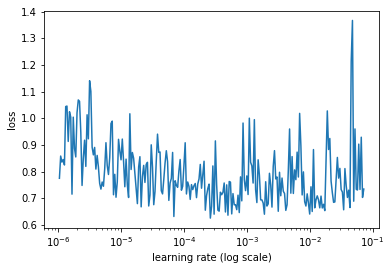

In [13]:
import sys
sys.path.append(r"C:\Users\eg38emed\FCD\FCD vs TSC\keras_utils")
from keras_lr_finder import LRFinder

lr_gen = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        batch_size=4000,
                                        class_mode='categorical')

x_lr_train,y_lr_train= lr_gen.next();x_lr_train.shape
lr_finder = LRFinder(model_X)

lr_finder.find(x_lr_train, y_lr_train, 0.000001, 0.1, batch_size=64, epochs=4)
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

In [ ]:
import clr_callback
from keras.callbacks import CSVLogger
def get_callbacks_clr(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    clr = clr_callback.CyclicLR(base_lr=0.0001, max_lr=0.0005,
                        step_size=num_train_samples/train_batch_size_1/2)
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_toplayer.csv".format(model_name), append=True)
    return [clr, earlystopping, ReduceLR, checkpoint, csv_logger]

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_ALL.csv".format(model_name), append=True)
    return [earlystopping, ReduceLR, checkpoint, csv_logger]

name_weights = (base_path + "\\{}_toplayer.h5".format(model_name))
callbacks_list = get_callbacks_clr(name_weights = name_weights)

In [ ]:
history = model_X.fit_generator(train_gen_1, 
                    steps_per_epoch=train_gen_1.samples // train_batch_size_1, 
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_batch_size,
                    epochs=20, verbose=1,
                    callbacks=callbacks_list)

plot_history(history, modelname = model_name, path=base_path)

Epoch 1/20
 270/1134 [======>.......................] - ETA: 5:21 - loss: 0.6851 - categorical_accuracy: 0.5914 - auc_roc: 0.5913

In [ ]:
model_X = get_model_classif_Xception()

In [ ]:
import sys
sys.path.append(r"C:\Users\eg38emed\FCD\FCD vs TSC\keras_utils")
from keras_lr_finder import LRFinder

lr_gen = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=4000,
                                        class_mode='categorical')

x_lr_train,y_lr_train= lr_gen.next();x_lr_train.shape
lr_finder = LRFinder(model_X)

lr_finder.find(x_lr_train, y_lr_train, 0.000001, 0.1, batch_size=64, epochs=4)
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

In [ ]:
import clr_callback
def get_callbacks_clr(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    clr = clr_callback.CyclicLR(base_lr=0.0001, max_lr=0.0005,
                        step_size=num_train_samples/train_batch_size_1/2)
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_ALL.csv".format(modelname), append=True)
    return [clr, earlystopping, ReduceLR, checkpoint, csv_logger]

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    csv_logger = CSVLogger(filename = base_path + "\\model_history_{}_ALL.csv".format(modelname), append=True)
    return [earlystopping, ReduceLR, checkpoint, csv_logger]

name_weights = (base_path + "\\{}_ALL.h5".format(model_name))
callbacks_list = get_callbacks_clr(name_weights = name_weights)

In [ ]:
model_X.load_weights(base_path + "\\{}_toplayer.h5".format(model_name))
history = model_X.fit_generator(train_gen_1, 
                    steps_per_epoch=train_gen_1.samples // train_batch_size_1, 
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_batch_size,
                    epochs=100, verbose=1,
                    callbacks=callbacks_list)

plot_history(history, modelname = model_name, path=base_path)

# Xception + NASNetM

In [ ]:
model_name = 'Xception_NASNetM'
base_path = (r'C:\Users\eg38emed\FCD\Models\{}'.format(model_name))
if not os.path.exists(base_path):
    os.makedirs(base_path)

In [ ]:
def get_model_classif_nasnet_x():
    # Model Idea Xception + NASNetM
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
    inputs = Input(input_shape)

    xception = applications.Xception(weights='imagenet', include_top=False, input_shape=input_shape)  
    nas_net = NASNetMobile(weights=None, include_top=False, input_shape=input_shape)

    outputs = Concatenate(axis=-1)([GlobalAveragePooling2D()(xception(inputs)),
                                    GlobalAveragePooling2D()(nas_net(inputs))])
    outputs = Dropout(0.5)(outputs)
    outputs = Dense(2, activation='softmax')(outputs)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=[categorical_accuracy, auc_roc])
    model.summary()
    return model

In [ ]:
model_NASNetM_X = get_model_classif_nasnet_x()

import sys
sys.path.append(r"C:\Users\eg38emed\FCD\FCD vs TSC\keras_utils")
from keras_lr_finder import LRFinder

lr_gen = datagen_train.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=4000,
                                        class_mode='categorical')

x_lr_train,y_lr_train= lr_gen.next();x_lr_train.shape
lr_finder = LRFinder(model_X)

lr_finder.find(x_lr_train, y_lr_train, 0.000001, 0.1, batch_size=64, epochs=4)
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

In [ ]:
import clr_callback
def get_callbacks_clr(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    clr = clr_callback.CyclicLR(base_lr=0.0001, max_lr=0.0005,
                        step_size=num_train_samples/train_batch_size_1/2)
    csv_logger = CSVLogger(filename = base_path + "model_history_{}_ALL.csv".format(modelname), append=True)
    return [clr, earlystopping, ReduceLR, checkpoint, csv_logger]

def get_callbacks(name_weights):
    ReduceLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    earlystopping = EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.001, patience=15, verbose=1, mode='auto')
    checkpoint = ModelCheckpoint(name_weights, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    csv_logger = CSVLogger(filename = base_path + "model_history_{}_ALL.csv".format(modelname), append=True)
    return [earlystopping, ReduceLR, checkpoint, csv_logger]

name_weights = (base_path + "\\{}.h5".format(model_name))
callbacks_list = get_callbacks_clr(name_weights = name_weights)

In [ ]:
history = model_NASNetM_X.fit_generator(train_gen_1, 
                    steps_per_epoch=train_gen_1.samples // train_batch_size_1, 
                    validation_data=val_gen,
                    validation_steps=val_gen.samples // val_batch_size,
                    epochs=100, verbose=1,
                    callbacks=callbacks_list)

plot_history(history, modelname = model_name, path=base_path)

# RESNet

# DenseNet